# Imports & Setup

In [1]:
from PIL import Image                             #Used for opening, manipulating, and saving many different image file formats. Handy when you’re doing any pre-processing or manual inspection.
import os                                         #rovides access to operating system functions. Essential for navigating directories containing image datasets.
import numpy as np                                #Brings in NumPy for numerical operations—especially useful for handling image arrays and dataset manipulation.
import matplotlib.pyplot as plt                   #seful for visualizing images, loss curves, or model performance metrics.
import seaborn as sns                             #A data visualization library based on matplotlib—great for plotting heatmaps of confusion matrices or EDA results.
from tensorflow.keras.preprocessing.image import ImageDataGenerator                      
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten, Dense, Dropout)    #Conv2D: Applies convolution filters to extract features from the input image.MaxPooling2D: Downsamples the feature maps to reduce dimensionality and computation.Flatten: Converts 2D matrices into a 1D vector to pass into dense layers.Dense: Fully connected layers used for classification.Dropout: Helps prevent overfitting by randomly “dropping” neurons during training.
from tensorflow.keras.optimizers import Adam                                           #Adam Optimizer A popular gradient descent optimization algorithm. Adaptive and efficient for most training problems.
from sklearn.metrics import classification_report, confusion_matrix                    #classification_report & confusion_matrix from sklearn.metrics Used to evaluate the model’s predictions—precision, recall, F1-score, and confusion matrix visualization.

# Data Loading & Augmentation

In [2]:

train_path = "AiHistrograph_dataset/train"
test_path = "AiHistrograph_dataset/test"

img_size = (128, 128)
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=10, zoom_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_gen = test_datagen.flow_from_directory(
    test_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Option 2: If some files are missing, you can add error handling
#try:
    #cnn_history = cnn.fit(train_gen, epochs=10, validation_data=test_gen)
    #cnn_eval = cnn.evaluate(test_gen)
    #print(f"CNN Test Accuracy: {cnn_eval[1]*100:.2f}%")
#except FileNotFoundError as e:
    #print(f"Error: {e}")
    #print("Please check if all image files exist in the dataset directory.")
    # You might want to list the directory contents to debug
    #import os
    #print("Files in train directory:", os.listdir("AiHistrograph_dataset/train"))


Found 8006 images belonging to 7 classes.
Found 1038 images belonging to 7 classes.


In [3]:
def validate_images(directory):
    for folder in os.listdir(directory):
        folder_path = os.path.join(directory, folder)
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            try:
                img = Image.open(file_path)
                img.verify()
            except Exception as e:
                print(f"Corrupted or unreadable image: {file_path} | Error: {e}")

validate_images("AiHistrograph_dataset/train")
validate_images("AiHistrograph_dataset/test")

# CNN Model: Architecture

In [4]:
cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(96, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Dropout(0.3),
    
    Flatten(),
    
    Dense(128, activation='relu'),
    
    Dense(train_gen.num_classes, activation='softmax')
])

cnn.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
cnn.summary()

C:\Users\ibmuser\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 96)     │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,408,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,484,263 (9.48 MB)

 Trainable params: 2,484,263 (9.48 MB)

 Non-trainable params: 0 (0.00 B)

# CNN Training & Evaluation

In [5]:
cnn_history = cnn.fit(train_gen, epochs=10, validation_data=test_gen)

cnn_eval = cnn.evaluate(test_gen)
print(f"CNN Test Accuracy: {cnn_eval[1]*100:.2f}%")


C:\Users\ibmuser\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 235s 910ms/step - accuracy: 0.5799 - loss: 1.1389 - val_accuracy: 0.7004 - val_loss: 0.8676
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 224s 891ms/step - accuracy: 0.7761 - loss: 0.6498 - val_accuracy: 0.7996 - val_loss: 0.5245
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 254s 1s/step - accuracy: 0.8082 - loss: 0.5203 - val_accuracy: 0.8237 - val_loss: 0.5119
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 238s 948ms/step - accuracy: 0.8457 - loss: 0.4424 - val_accuracy: 0.8555 - val_loss: 0.4021
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 242s 967ms/step - accuracy: 0.8433 - loss: 0.4286 - val_accuracy: 0.7958 - val_loss: 0.5963
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 226s 900ms/step - accuracy: 0.8579 - loss: 0.3747 - val_accuracy: 0.8574 - val_loss: 0.4016
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 206s 822ms/step - accuracy: 0.8791 - loss: 0.3308 - val_accuracy: 0.8497 - val_loss: 0.4383
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 190s 759ms/step - accuracy: 0.8821 - lo

# Plot Accuracy & Loss Curves

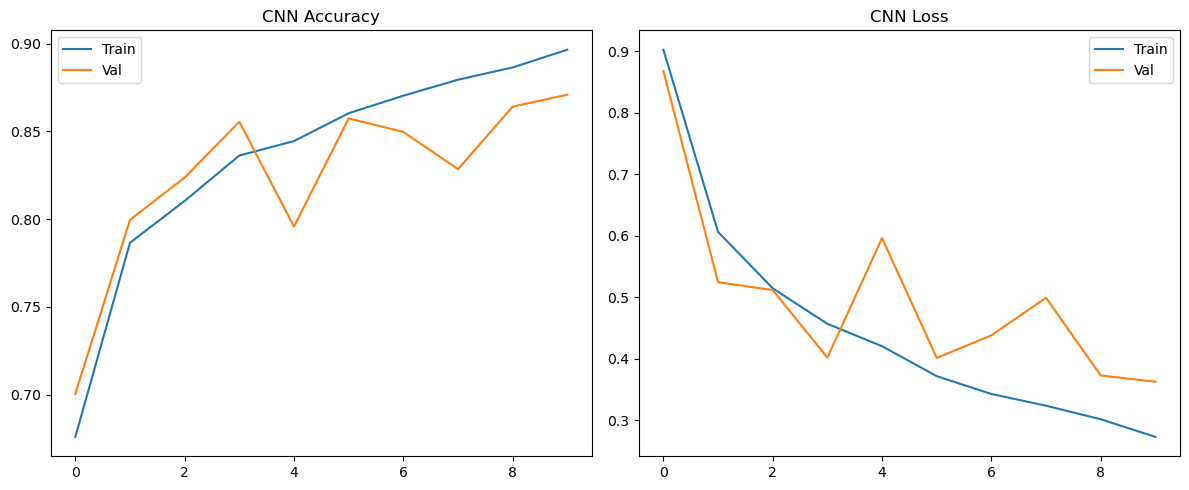

In [6]:
def plot_history(history, title):
    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Val')
    plt.title(f'{title} Accuracy')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Val')
    plt.title(f'{title} Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(cnn_history, "CNN")



# Classification Report & Confusion Matrix (CNN Example)

33/33 ━━━━━━━━━━━━━━━━━━━━ 20s 570ms/step
              precision    recall  f1-score   support

       Coins       1.00      1.00      1.00        27
    drawings       0.67      0.56      0.61       122
   engraving       0.70      0.82      0.76        84
 iconography       0.88      0.95      0.91       229
    painting       0.93      0.87      0.90       228
       scrip       1.00      1.00      1.00       161
   sculpture       0.85      0.87      0.86       187

    accuracy                           0.87      1038
   macro avg       0.86      0.87      0.86      1038
weighted avg       0.87      0.87      0.87      1038



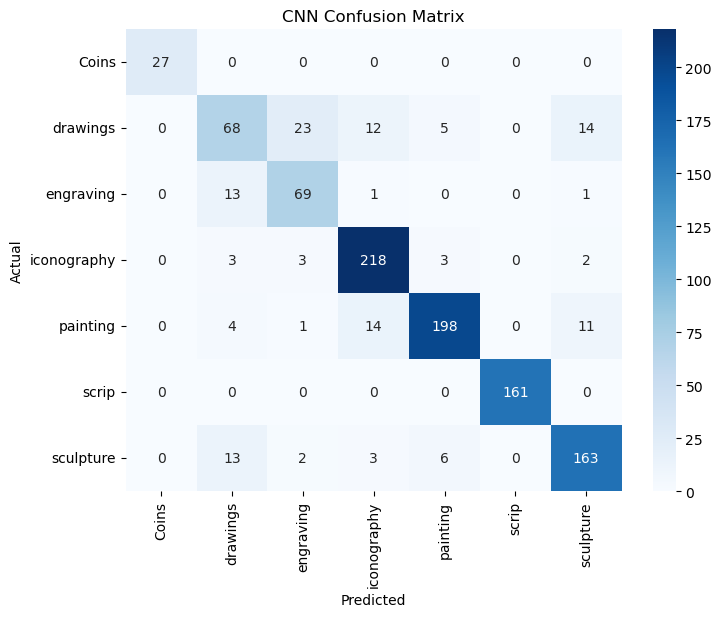

In [7]:
# Predictions
y_pred_cnn = np.argmax(cnn.predict(test_gen), axis=1)
y_true = test_gen.classes
class_labels = list(test_gen.class_indices.keys())

# Report
print(classification_report(y_true, y_pred_cnn, target_names=class_labels))

# Confusion Matrix
conf_mat = confusion_matrix(y_true, y_pred_cnn)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [8]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess the image
img = image.load_img('class29_image1.png', target_size=(128, 128))  # Match training size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize just like training

# Predict
prediction = cnn.predict(img_array)
predicted_class = np.argmax(prediction[0])

# Use the correct class label mapping from your generator
class_labels = list(train_gen.class_indices.keys())
print("Predicted class:", class_labels[predicted_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
Predicted class: Coins


In [9]:
# Save the trained model
cnn.save('aihistograph_model.h5')
print("✅ Model saved as 'aihistograph_model.h5'")


✅ Model saved as 'aihistograph_model.h5'
